<a href="https://colab.research.google.com/github/Rupesh-rkgit/100DaysOfMLCode/blob/master/site/en/tutorials/structured_data/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [14]:
epoch = 150
units = 50
batch = 1
look_back = 10

In [15]:


# Load your dataset
# Replace 'your_data.csv' with the path to your dataset
data = pd.read_csv('/content/Energy_imf2.csv')

# Preprocess the data
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

# Create a function to convert the data into a suitable format for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Prepare the data for LSTM

X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape the input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Create the LSTM model
model = Sequential()
model.add(LSTM(units, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=epoch, batch_size=batch, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert the predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate the root mean squared error (RMSE)
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

# Predict the next 10 years
future_years = 10
predictions = []

last_data = np.array(scaled_data[-look_back:]).reshape(1, 1, look_back)
for _ in range(future_years):
    prediction = model.predict(last_data)
    predictions.append(prediction[0][0])
    last_data = np.append(last_data[0][0][1:], prediction).reshape(1, 1, look_back)

# Invert the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
print("Predictions for the next 10 years:")
print(predictions)


Epoch 1/150
82/82 - 3s - loss: 0.0698 - 3s/epoch - 38ms/step
Epoch 2/150
82/82 - 0s - loss: 0.0215 - 258ms/epoch - 3ms/step
Epoch 3/150
82/82 - 0s - loss: 0.0208 - 262ms/epoch - 3ms/step
Epoch 4/150
82/82 - 0s - loss: 0.0177 - 253ms/epoch - 3ms/step
Epoch 5/150
82/82 - 0s - loss: 0.0171 - 254ms/epoch - 3ms/step
Epoch 6/150
82/82 - 0s - loss: 0.0158 - 272ms/epoch - 3ms/step
Epoch 7/150
82/82 - 0s - loss: 0.0135 - 254ms/epoch - 3ms/step
Epoch 8/150
82/82 - 0s - loss: 0.0136 - 256ms/epoch - 3ms/step
Epoch 9/150
82/82 - 0s - loss: 0.0146 - 252ms/epoch - 3ms/step
Epoch 10/150
82/82 - 0s - loss: 0.0118 - 263ms/epoch - 3ms/step
Epoch 11/150
82/82 - 0s - loss: 0.0114 - 256ms/epoch - 3ms/step
Epoch 12/150
82/82 - 0s - loss: 0.0111 - 252ms/epoch - 3ms/step
Epoch 13/150
82/82 - 0s - loss: 0.0105 - 252ms/epoch - 3ms/step
Epoch 14/150
82/82 - 0s - loss: 0.0098 - 252ms/epoch - 3ms/step
Epoch 15/150
82/82 - 0s - loss: 0.0093 - 255ms/epoch - 3ms/step
Epoch 16/150
82/82 - 0s - loss: 0.0095 - 256ms/epoc

In [16]:


# Load your dataset
# Replace 'your_data.csv' with the path to your dataset
data = pd.read_csv('/content/Energy_imf1.csv')

# Preprocess the data
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

# Create a function to convert the data into a suitable format for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Prepare the data for LSTM

X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape the input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Create the LSTM model
model = Sequential()
model.add(LSTM(units, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=epoch, batch_size=batch, verbose=2)

# Make predictions
train_predict1 = model.predict(X_train)
test_predict1 = model.predict(X_test)

# Invert the predictions
train_predict1 = scaler.inverse_transform(train_predict1)
y_train = scaler.inverse_transform([y_train])
test_predict1 = scaler.inverse_transform(test_predict1)
y_test = scaler.inverse_transform([y_test])

# Calculate the root mean squared error (RMSE)
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predict1[:, 0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict1[:, 0]))
print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

# Predict the next 10 years
future_years = 10
predictions1 = []

last_data1 = np.array(scaled_data[-look_back:]).reshape(1, 1, look_back)
for _ in range(future_years):
    prediction1 = model.predict(last_data1)
    predictions1.append(prediction1[0][0])
    last_data1 = np.append(last_data1[0][0][1:], prediction1).reshape(1, 1, look_back)

# Invert the predictions
predictions1 = scaler.inverse_transform(np.array(predictions1).reshape(-1, 1))
print("Predictions for the next 10 years:")
print(predictions1)


Epoch 1/150
82/82 - 2s - loss: 0.0562 - 2s/epoch - 25ms/step
Epoch 2/150
82/82 - 0s - loss: 0.0218 - 250ms/epoch - 3ms/step
Epoch 3/150
82/82 - 0s - loss: 0.0207 - 245ms/epoch - 3ms/step
Epoch 4/150
82/82 - 0s - loss: 0.0215 - 250ms/epoch - 3ms/step
Epoch 5/150
82/82 - 0s - loss: 0.0190 - 245ms/epoch - 3ms/step
Epoch 6/150
82/82 - 0s - loss: 0.0176 - 233ms/epoch - 3ms/step
Epoch 7/150
82/82 - 0s - loss: 0.0173 - 233ms/epoch - 3ms/step
Epoch 8/150
82/82 - 0s - loss: 0.0162 - 254ms/epoch - 3ms/step
Epoch 9/150
82/82 - 0s - loss: 0.0175 - 240ms/epoch - 3ms/step
Epoch 10/150
82/82 - 0s - loss: 0.0162 - 262ms/epoch - 3ms/step
Epoch 11/150
82/82 - 0s - loss: 0.0157 - 242ms/epoch - 3ms/step
Epoch 12/150
82/82 - 0s - loss: 0.0161 - 271ms/epoch - 3ms/step
Epoch 13/150
82/82 - 0s - loss: 0.0149 - 312ms/epoch - 4ms/step
Epoch 14/150
82/82 - 0s - loss: 0.0139 - 312ms/epoch - 4ms/step
Epoch 15/150
82/82 - 0s - loss: 0.0162 - 328ms/epoch - 4ms/step
Epoch 16/150
82/82 - 0s - loss: 0.0138 - 330ms/epoc

In [17]:
train_predict+=train_predict1
test_predict+=test_predict1
predictions+=predictions1

In [18]:


# Load your dataset
# Replace 'your_data.csv' with the path to your dataset
data = pd.read_csv('/content/Earthquake_Energy.csv')

# Preprocess the data
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)



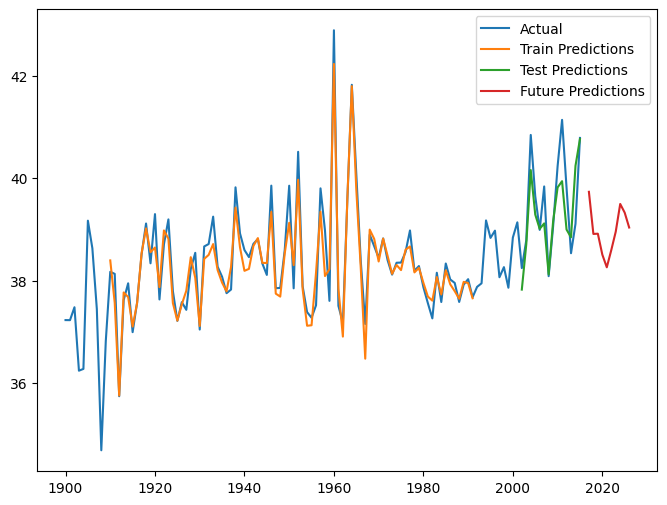

In [19]:


# Visualize the predictions and errors
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual')
plt.plot(data.index[look_back:train_size], train_predict, label='Train Predictions')
plt.plot(data.index[train_size+look_back:], test_predict, label='Test Predictions')
plt.plot(pd.date_range(start=data.index[-1], periods=future_years+1, freq='Y')[1:], predictions, label='Future Predictions')
plt.legend()
plt.show()



In [23]:
print("hello")

hello


In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_data.csv' with the path to your dataset
data = pd.read_csv('/content/Energy_imf2.csv')

# Preprocess the data
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Make predictions
train_predict = model_fit.predict(start=train.index[0], end=train.index[-1], typ='levels')
test_predict = model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')

# Add the first value in the training set to the predictions for the training set
train_predict = np.insert(train_predict, 0, train.iloc[0])

# Calculate the root mean squared error (RMSE)
train_rmse = np.sqrt(mean_squared_error(train, train_predict))
test_rmse = np.sqrt(mean_squared_error(test, test_predict))
print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

# Predict the next 10 years
future_years = 10
predictions = model_fit.predict(start=test.index[-1], end=test.index[-1]+pd.DateOffset(years=future_years), typ='levels')

# Visualize the predictions and errors
plt.plot(data.index, data, label='Actual')
plt.plot(train.index, train_predict, label='Train Predictions')
plt.plot(test.index, test_predict, label='Test Predictions')
plt.plot(predictions.index, predictions, label='Future Predictions')
plt.legend()
plt.show()

train_error = train - train_predict
test_error = test - test_predict
plt.plot(train.index, train_error, label='Train Error')
plt.plot(test.index, test_error, label='Test Error')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ValueError: ignored

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_data.csv' with the path to your dataset
data = pd.read_csv('/content/Energy_imf2.csv')

# Preprocess the data
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

# Create a function to convert the data into a suitable format for the Transformer model
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Prepare the data for the Transformer model
look_back = 10
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape the input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the Transformer model
def transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = MultiHeadAttention(num_heads=8, key_dim=1)(inputs, inputs)
    x = Add()([inputs, x])
    x = LayerNormalization()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(1)(x)
    outputs = Flatten()(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create an instance of the Transformer model
model = transformer_model(input_shape=(look_back, 1))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert the predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate the root mean squared error (RMSE)
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')





Epoch 1/100
3/3 - 3s - loss: 0.2680 - val_loss: 0.6300 - 3s/epoch - 957ms/step
Epoch 2/100
3/3 - 0s - loss: 0.2491 - val_loss: 0.5992 - 41ms/epoch - 14ms/step
Epoch 3/100
3/3 - 0s - loss: 0.2308 - val_loss: 0.5679 - 39ms/epoch - 13ms/step
Epoch 4/100
3/3 - 0s - loss: 0.2121 - val_loss: 0.5364 - 42ms/epoch - 14ms/step
Epoch 5/100
3/3 - 0s - loss: 0.1943 - val_loss: 0.5047 - 43ms/epoch - 14ms/step
Epoch 6/100
3/3 - 0s - loss: 0.1762 - val_loss: 0.4732 - 42ms/epoch - 14ms/step
Epoch 7/100
3/3 - 0s - loss: 0.1589 - val_loss: 0.4417 - 40ms/epoch - 13ms/step
Epoch 8/100
3/3 - 0s - loss: 0.1422 - val_loss: 0.4104 - 41ms/epoch - 14ms/step
Epoch 9/100
3/3 - 0s - loss: 0.1256 - val_loss: 0.3796 - 43ms/epoch - 14ms/step
Epoch 10/100
3/3 - 0s - loss: 0.1115 - val_loss: 0.3495 - 43ms/epoch - 14ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0972 - val_loss: 0.3203 - 41ms/epoch - 14ms/step
Epoch 12/100
3/3 - 0s - loss: 0.0842 - val_loss: 0.2925 - 56ms/epoch - 19ms/step
Epoch 13/100
3/3 - 0s - loss: 0.0716 -

In [10]:

# Predict the next 10 years
future_years = 10
last_data = np.array(scaled_data[-look_back:]).reshape(1, look_back, 1)
predictions = []
for _ in range(future_years):
    prediction = model.predict(last_data)
    predictions.append(prediction[0][0])
    last_data = np.append(last_data[:, 1:, :], prediction).reshape(1, look_back, 1)

# Invert the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
print("Predictions for the next 10 years:")
print(predictions)

# Visualize the predictions and errors
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual')
plt.plot(data.index[look_back:train_size], train_predict, label='Train Predictions')
plt.plot(data.index[train_size+look_back:], test_predict, label='Test Predictions')
plt.plot(pd.date_range(start=data.index[-1], periods=future_years+1, freq='Y')[1:], predictions, label='Future Predictions')
plt.legend()
plt.show()





1/1 [==============================] - 0s 63ms/step


ValueError: ignored

In [ ]:
# Visualize the predictions and errors
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual')
plt.plot(data.index[look_back:train_size], train_predict, label='Train Predictions')
plt.plot(data.index[train_size+look_back:], test_predict, label='Test Predictions')
plt.plot(pd.date_range(start=data.index[-1], periods=future_years+1, freq='Y')[1:], predictions, label='Future Predictions')
plt.legend()
plt.show()


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam

# Step 1: Load and preprocess the data
df = pd.read_csv('/content/Energy_imf2.csv')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df = df.set_index('Year')

# Step 2: Prepare the data
scaler = MinMaxScaler()
data = scaler.fit_transform(df)
window_size = 10
X, y = [], []
for i in range(len(data)-window_size-10):
    X.append(data[i:i+window_size])
    y.append(data[i+window_size:i+window_size+10])
X_train, X_val = X[:int(len(X)*0.8)], X[int(len(X)*0.8):]
y_train, y_val = y[:int(len(y)*0.8)], y[int(len(y)*0.8):]

# Step 3: Build the transformer model
def transformer_model(input_shape, output_sequence_length):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, kernel_size=2, padding='causal', activation='relu')(inputs)
    x = LayerNormalization()(x)
    x = Dropout(0.2)(x)
    x = Conv1D(128, kernel_size=2, padding='causal', activation='relu')(x)
    x = LayerNormalization()(x)
    x = Dropout(0.2)(x)
    x = Conv1D(256, kernel_size=2, padding='causal', activation='relu')(x)
    x = LayerNormalization()(x)
    x = Dropout(0.2)(x)
    x = MultiHeadAttention(num_heads=8, key_dim=64)(x, x)
    x = Flatten()(x)
    x = Dense(output_sequence_length)(x)
    model = Model(inputs=inputs, outputs=x)
    return model

model = transformer_model(input_shape=(window_size, 1), output_sequence_length=10)
model.summary()

# Step 4: Train the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')
model.fit(np.array(X_train), np.array(y_train),
                    validation_data=(np.array(X_val), np.array(y_val)),
                    batch_size=32, epochs=100)







Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 10, 1)]      0           []                               
                                                                                                  
 conv1d_3 (Conv1D)              (None, 10, 64)       192         ['input_5[0][0]']                
                                                                                                  
 layer_normalization_6 (LayerNo  (None, 10, 64)      128         ['conv1d_3[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 dropout_6 (Dropout)            (None, 10, 64)       0           ['layer_normalization_6[0][

In [16]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert the predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate the root mean squared error (RMSE)
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')


# last_window = data[-window_size:]
# forecast = []
# for i in range(10):
#   prediction = model.predict(last_window.reshape(1, window_size, 1))
#   forecast.append(prediction[0])
#   last_window = np.concatenate([last_window[1:], prediction.reshape(1, 10, 1)], axis=1)
# forecast = np.array(forecast)
# forecast = scaler.inverse_transform(forecast)

# mse = np.mean(np.square(df[-10:].values - forecast))
# print(f"Mean squared error: {mse:.2f}")


ValueError: ignored

ValueError: ignored

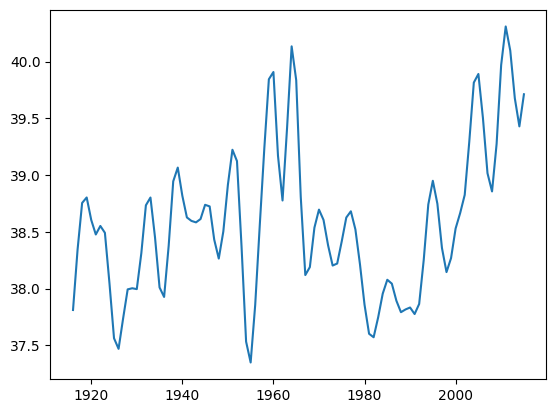

In [13]:
plt.plot(df.index[-100:], df[-100:].values, label='Actual')
plt.plot(pd.date_range(start=df.index[-1], periods=10, freq='Y'), forecast, label='Forecast')
plt.title('Earthquake Energy Time Series Forecast')
plt.xlabel('Year')
plt.ylabel('Energy')
plt.legend()
plt.show()
